#1.File upload

In [30]:
from google.colab import files
files.upload()


Saving 아빠민주.jpg to 아빠민주.jpg


{'아빠민주.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x98\xe4Exif\x00\x00II*\x00\x08\x00\x00\x00\x0c\x00\x00\x01\x04\x00\x01\x00\x00\x00\x00\n\x00\x00\x01\x01\x04\x00\x01\x00\x00\x00\xa0\x05\x00\x00\x0f\x01\x02\x00\x08\x00\x00\x00\x9e\x00\x00\x00\x10\x01\x02\x00\t\x00\x00\x00\xa6\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xd2\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xda\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x0e\x00\x00\x00\xb0\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xbe\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xe2\x00\x00\x00\x8e\x02\x00\x00samsung\x00SM-J710K\x00\x00J710KKKS1CTJ1\x002021:08:09 10:53:30\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00\x14\x00\x9a\x82\x05\x00\x01\x00\x00\x00b\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00j\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\'\x88\x03\x00

In [31]:
!ls -al

total 1648
drwxr-xr-x 1 root root   4096 Aug 23 02:56 .
drwxr-xr-x 1 root root   4096 Aug 23 02:28 ..
drwxr-xr-x 4 root root   4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root 601661 Aug 23 02:32 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root 676709 Aug 23 02:32 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root 168426 Aug 23 02:56 아빠민주.jpg
-rw-r--r-- 1 root root   9532 Aug 23 02:32 obama_01.jpeg
-rw-r--r-- 1 root root   5172 Aug 23 02:32 obama_02.jpeg
-rw-r--r-- 1 root root 194499 Aug 23 02:32 obama_03.jpg
drwxr-xr-x 1 root root   4096 Aug 13 13:35 sample_data


#2. load File

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [32]:
file_name = 'obama_03.jpg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name='haarcascade_eye_tree_eyeglasses.xml'

In [6]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [7]:
#--1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)
    

In [33]:
img = cv2.imread(file_name)


In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)


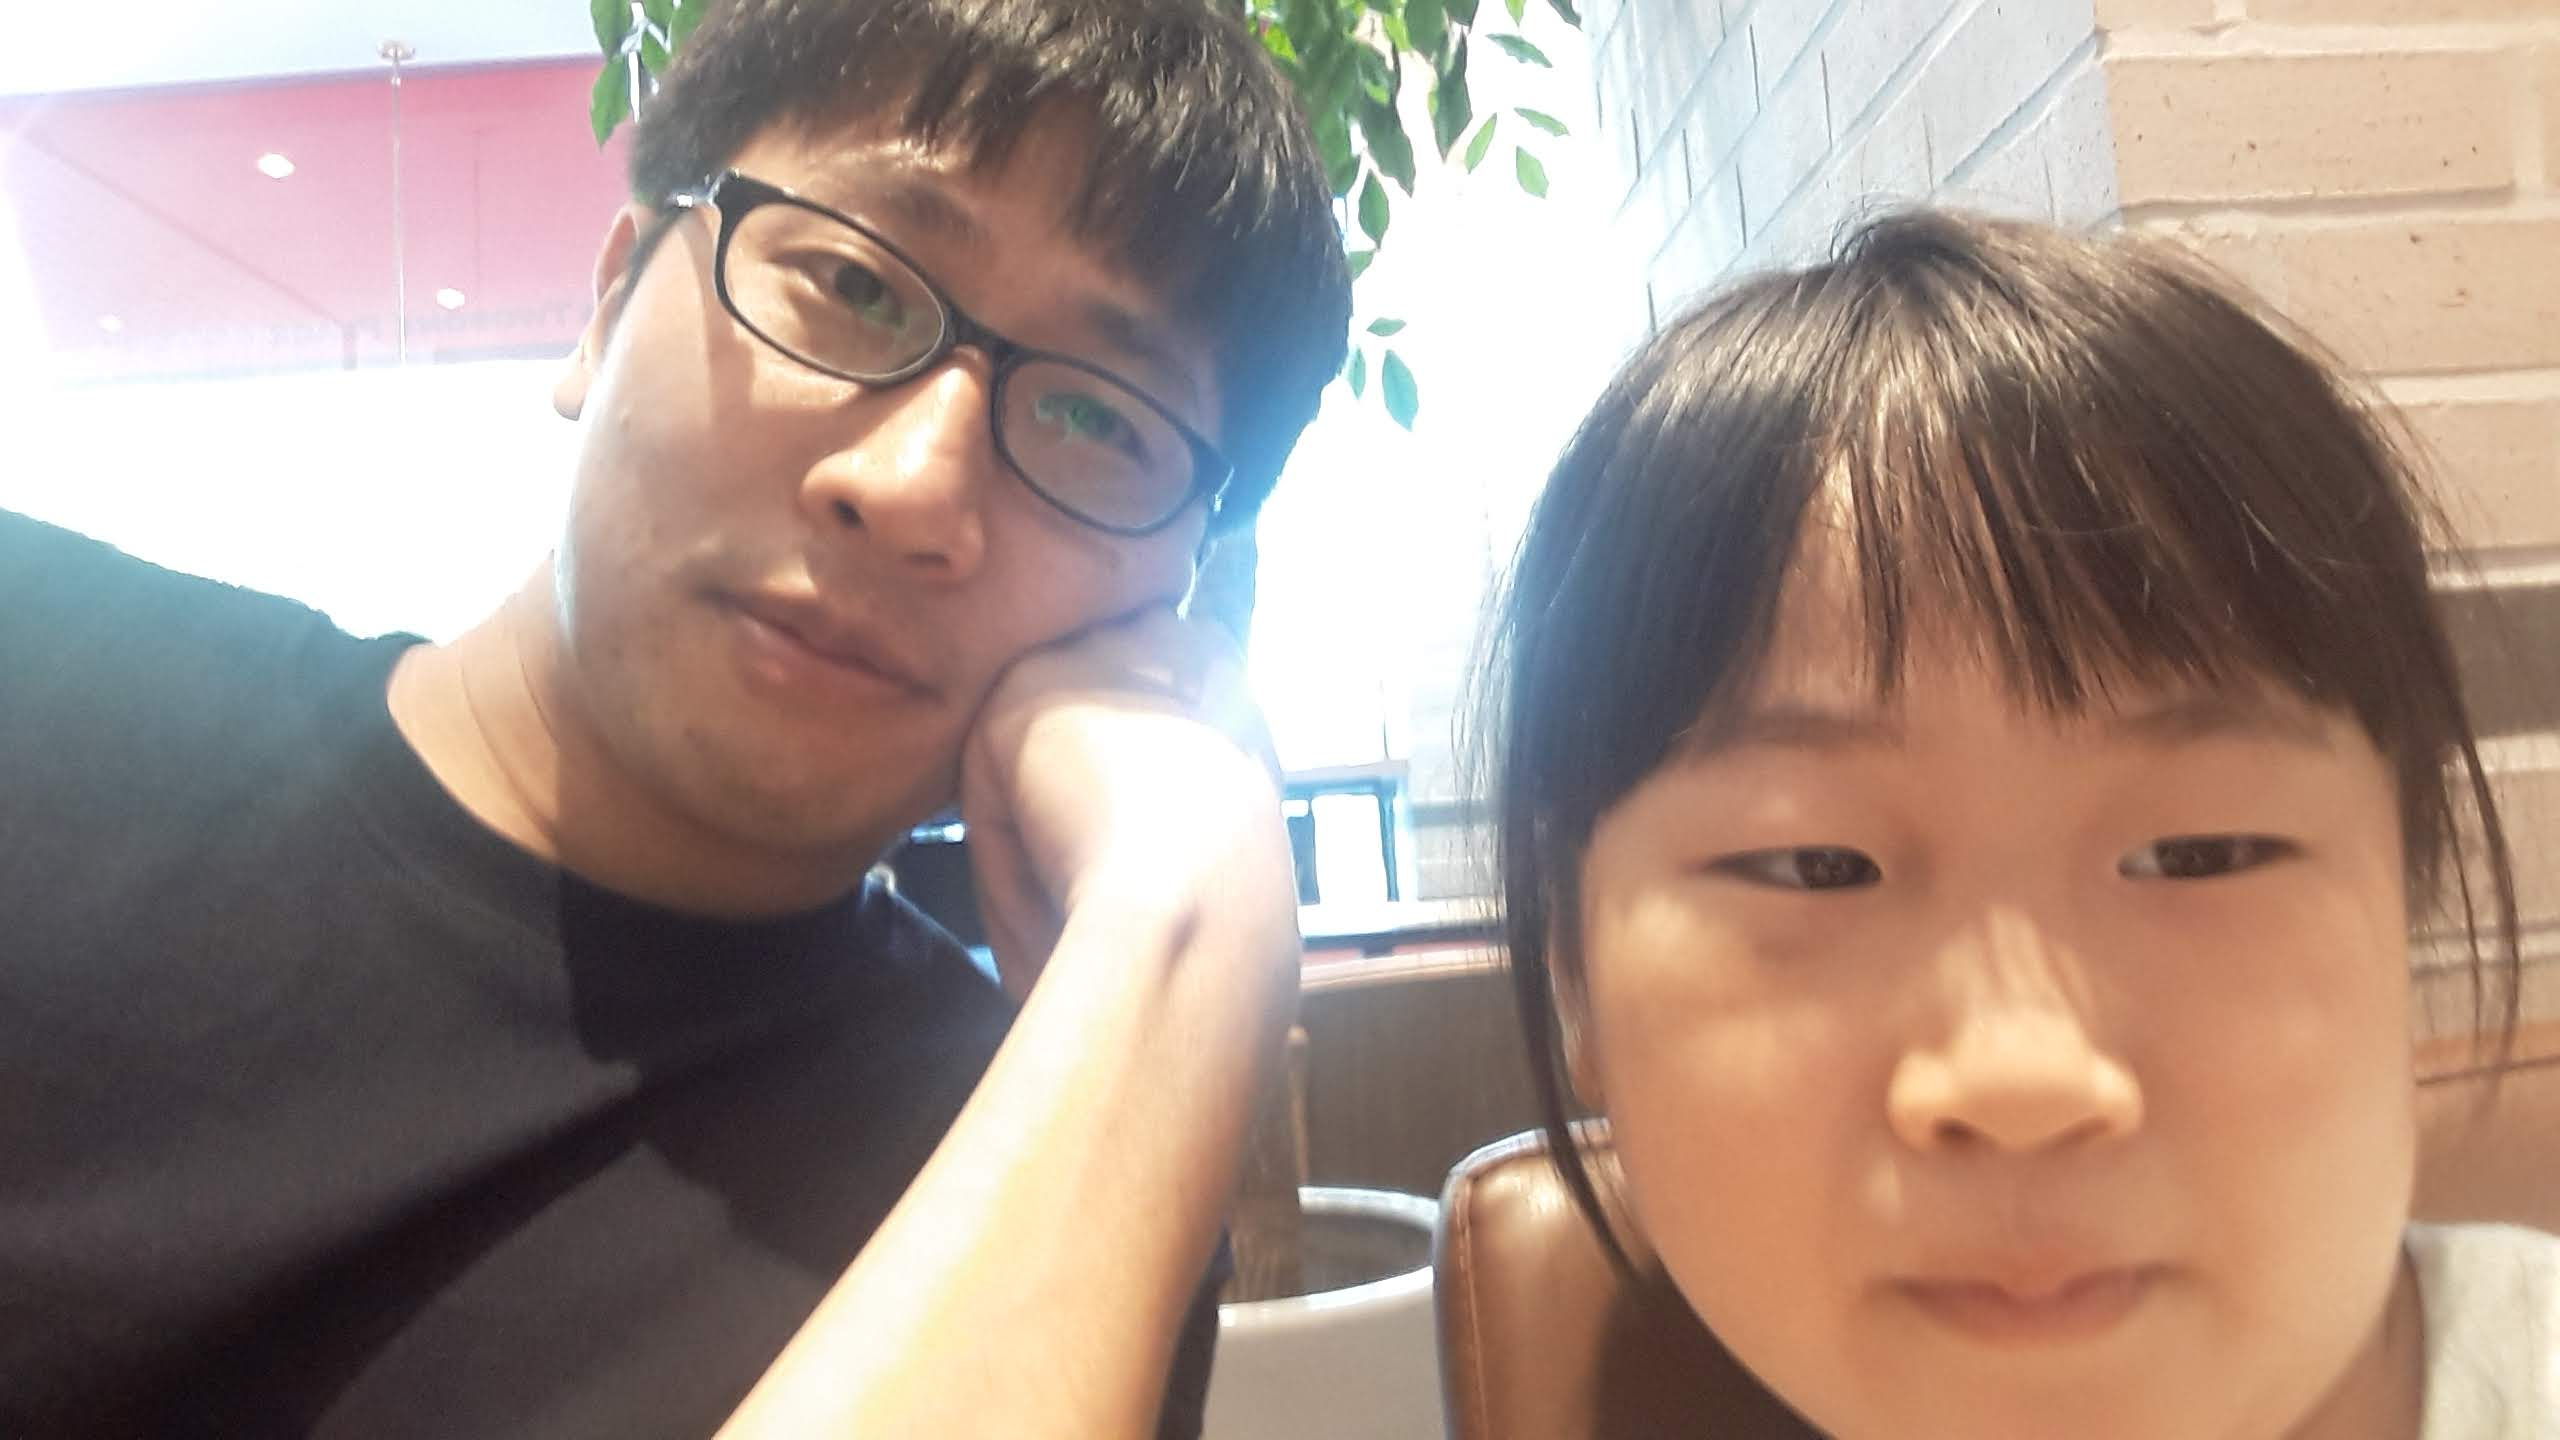

In [35]:
cv2_imshow(img)

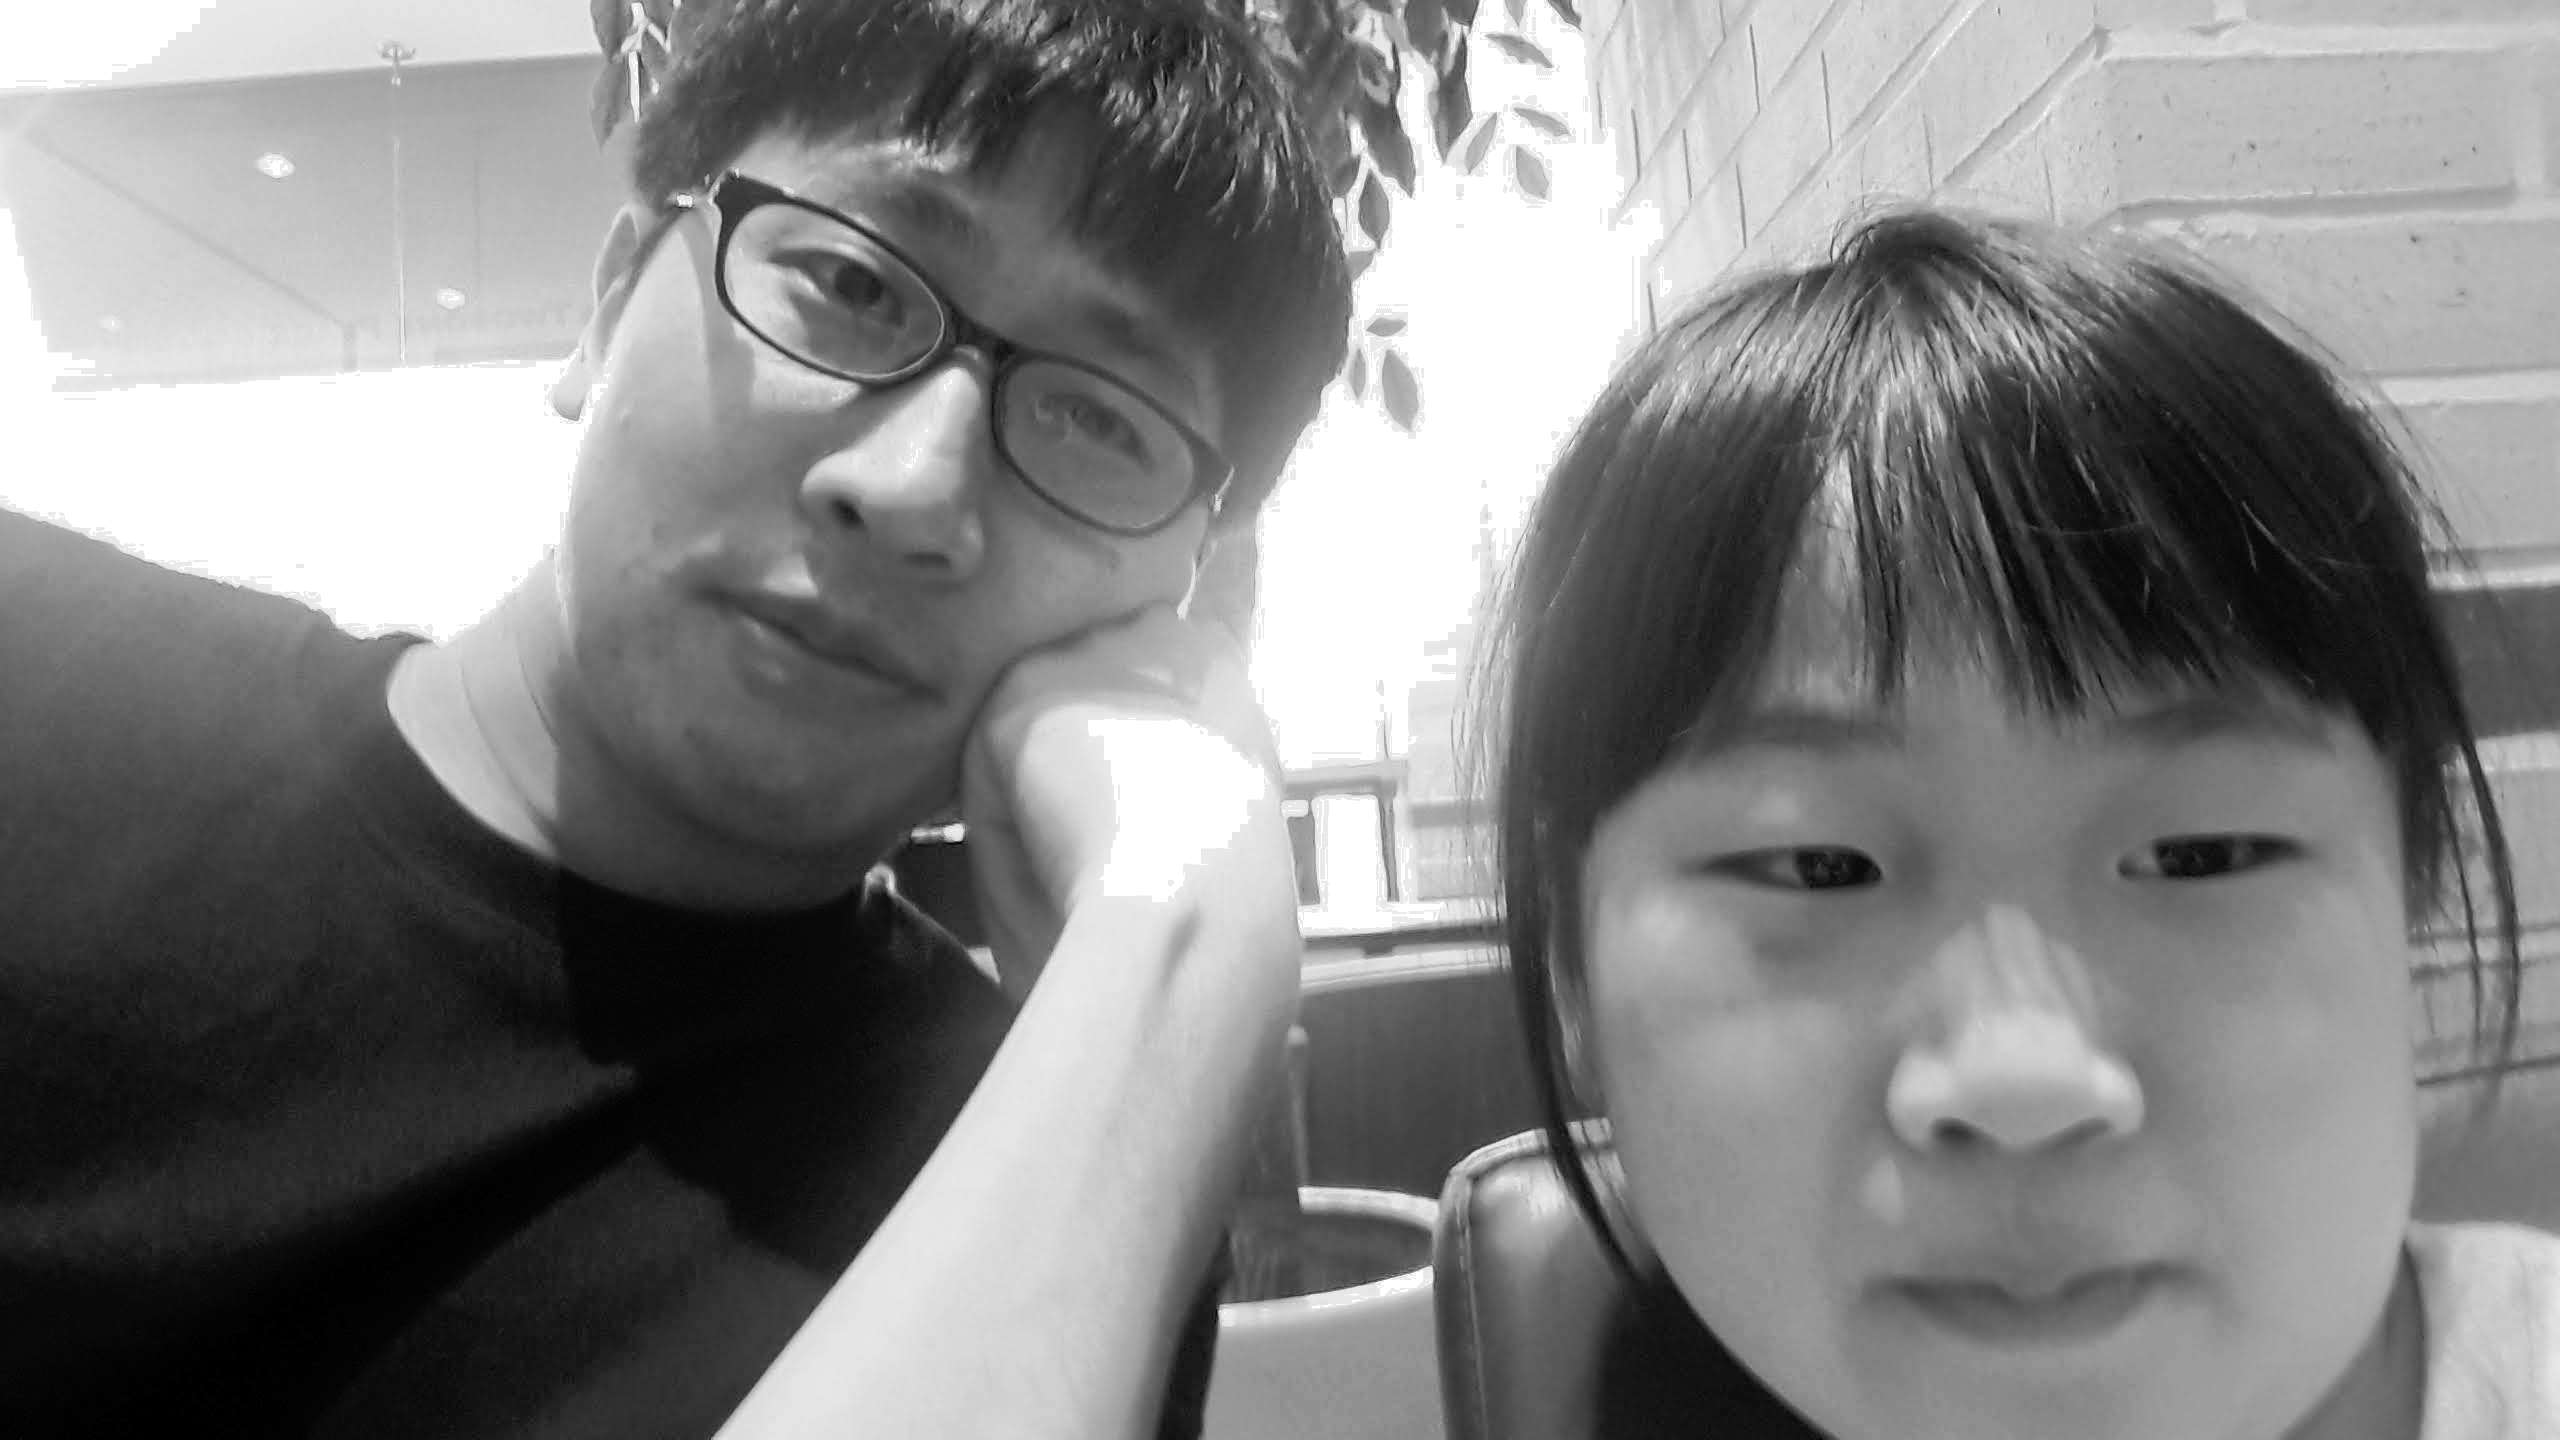

In [36]:
cv2_imshow(gray)

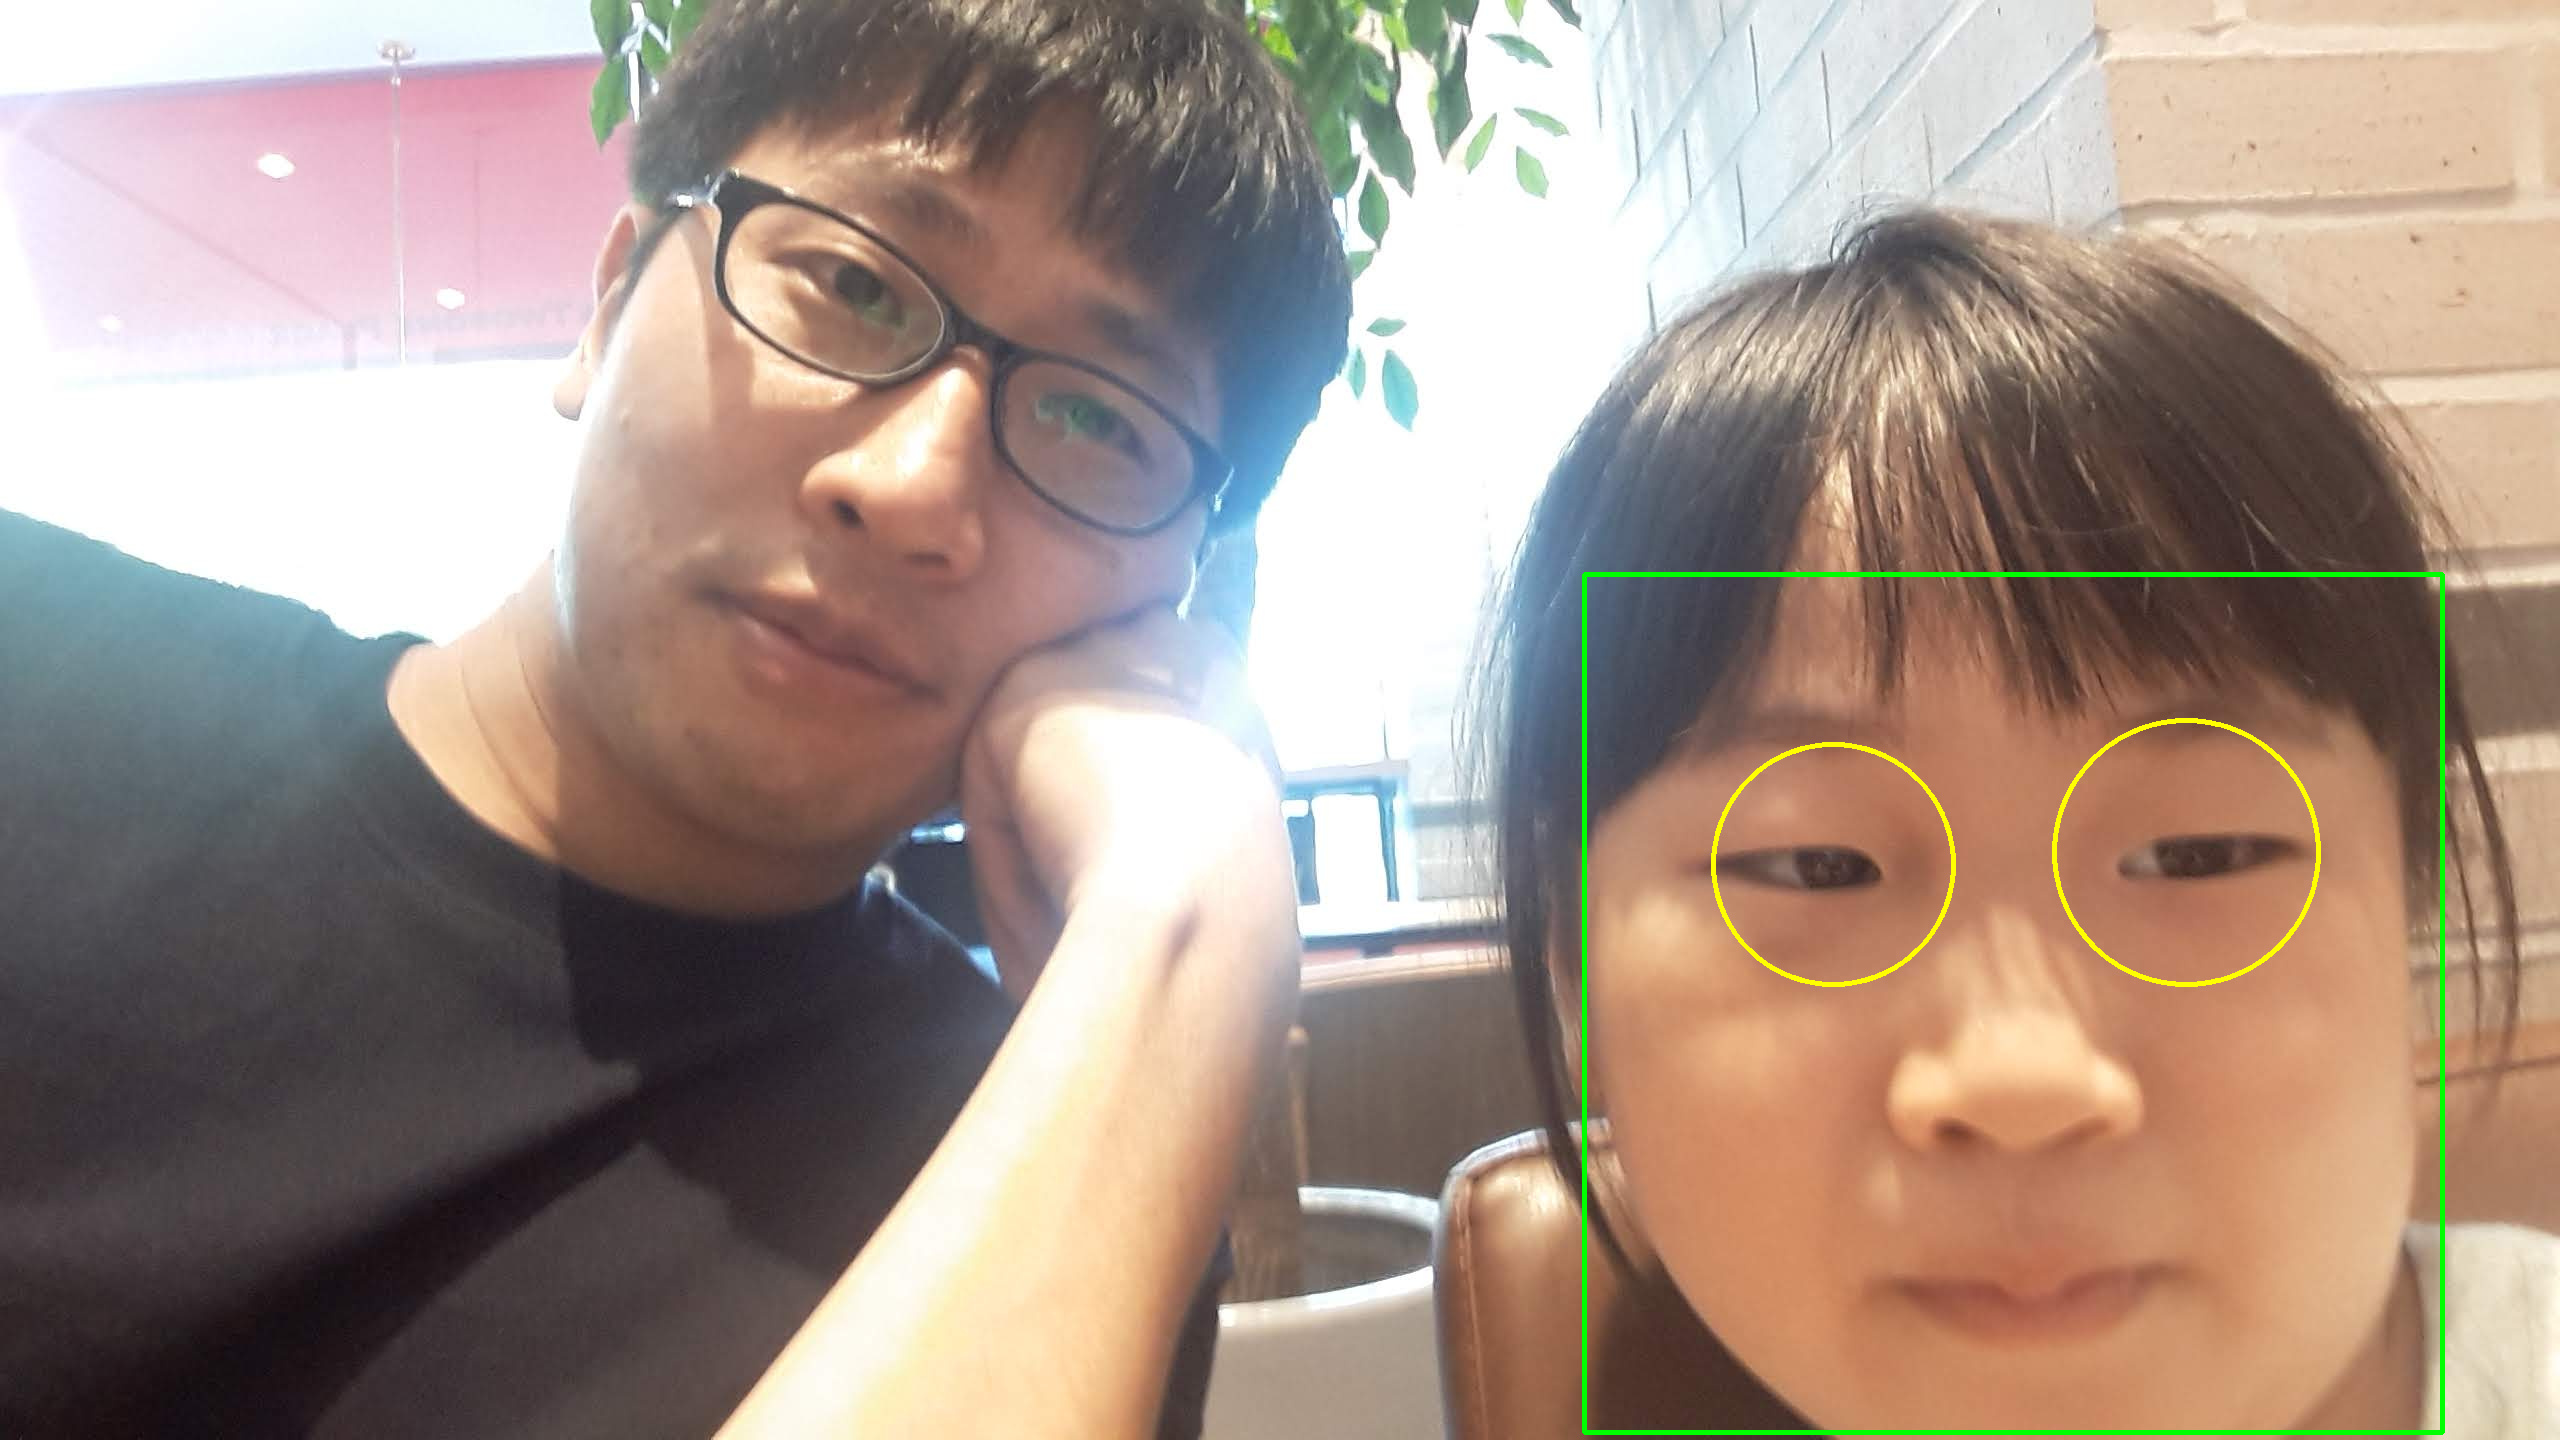

In [37]:
faces = face_cascade.detectMultiScale(gray)
for (x, y, w, h) in faces:
  center = (x+w//2, y+h//2)
  img = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)
  faceROI = gray[y:y+h, x:x+w]
  eyes = eyes_cascade.detectMultiScale(faceROI)
  for (x2, y2, w2, h2) in eyes:
    eye_center = (x + x2 + w2//2, y + y2 +h2//2)
    radius = int(round((w2+h2)*0.25))
    img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)

cv2_imshow(img)